In [1]:
from cldm.model import load_state_dict, create_model

In [2]:
!pip show transformers

Name: transformers
Version: 4.25.1
Summary: State-of-the-art Machine Learning for JAX, PyTorch and TensorFlow
Home-page: https://github.com/huggingface/transformers
Author: The Hugging Face team (past and future) with the help of all our contributors (https://github.com/huggingface/transformers/graphs/contributors)
Author-email: transformers@huggingface.co
License: Apache
Location: /opt/conda/lib/python3.10/site-packages
Requires: filelock, huggingface-hub, numpy, packaging, pyyaml, regex, requests, tokenizers, tqdm
Required-by: 


In [3]:
checkpoint_path = '../../../models/pix2pix-epoch=02-step=184000.ckpt'

In [4]:
state_dict = load_state_dict(checkpoint_path)

Loaded state_dict from [../../../models/pix2pix-epoch=02-step=184000.ckpt]


In [5]:
model = create_model('models/scldm_v15.yaml').cpu()

2024-01-19 14:57:02.244979: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-01-19 14:57:02.245031: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-01-19 14:57:02.288713: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 14:57:03.080745: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-01-19 14:57:03.080868: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

ExtendedControlLDM: Running in eps-prediction mode
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, 

Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.17.mlp.fc1.weight', 'vision_model.encoder.layers.13.self_attn.q_proj.bias', 'vision_model.encoder.layers.20.self_attn.out_proj.weight', 'vision_model.encoder.layers.3.self_attn.out_proj.weight', 'vision_model.encoder.layers.10.self_attn.out_proj.weight', 'vision_model.encoder.layers.7.layer_norm1.weight', 'vision_model.encoder.layers.22.self_attn.q_proj.weight', 'vision_model.encoder.layers.11.mlp.fc1.bias', 'vision_model.encoder.layers.2.self_attn.k_proj.weight', 'vision_model.encoder.layers.20.layer_norm1.weight', 'vision_model.encoder.layers.18.self_attn.v_proj.weight', 'vision_model.encoder.layers.5.mlp.fc2.weight', 'vision_model.encoder.layers.11.mlp.fc1.weight', 'vision_model.encoder.layers.2.layer_norm2.bias', 'vision_model.encoder.layers.3.self_attn.v_proj.weight', 'vision_model.encoder.layers.9.self_attn.v_proj.weight', 'vision_mode

Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 320, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 640, context_dim is 768 and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is None and using 8 heads.
Setting up MemoryEfficientCrossAttention. Query dim is 1280, context_dim is 768 and using 8 heads.
Setting up Me

In [6]:
# filtered_dict = {key: value for key, value in state_dict.items() if not key.startswith("cond_stage_model.transformer.text_model.embeddings.position_ids")}

In [7]:
model.load_state_dict(state_dict)

<All keys matched successfully>

In [8]:
# disable randomness, dropout, etc...
model.eval()
print()

In [9]:
import sys
import os
import cv2
import numpy as np
import torch
from PIL import Image
from pytorch_lightning import seed_everything
from tqdm import tqdm

from cldm.model import create_model, load_state_dict
from dataset.Fill50KDataset import Fill50KDataset
from inference import run_sampler
from share import *

logging improved.


In [25]:
image_path = './test_imgs/test2.png'

In [26]:
hint = cv2.imread(image_path)

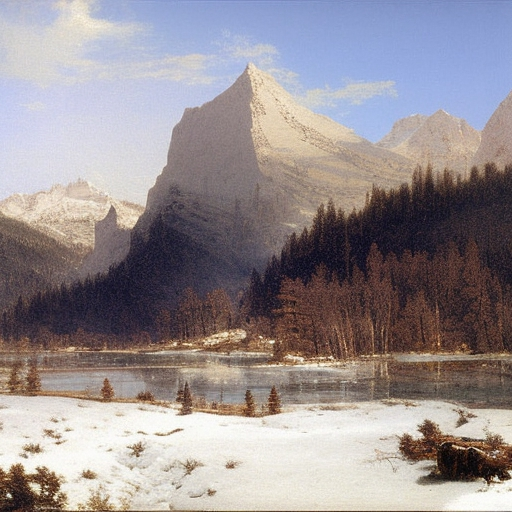

In [27]:
Image.fromarray(cv2.cvtColor(hint, cv2.COLOR_BGR2RGB), "RGB")

In [59]:
prompt = 'conver the scene from spring to winter'

In [60]:
results = run_sampler(model, hint, prompt, seed=42)

Seed set to 42


Data shape for DDIM sampling is (1, 4, 64, 64), eta 0.0
Running DDIM Sampling with 20 timesteps


DDIM Sampler: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.05it/s]


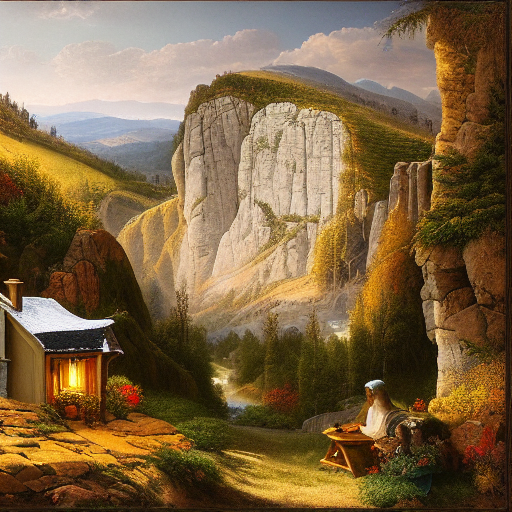

In [61]:
Image.fromarray(results[0], "RGB")

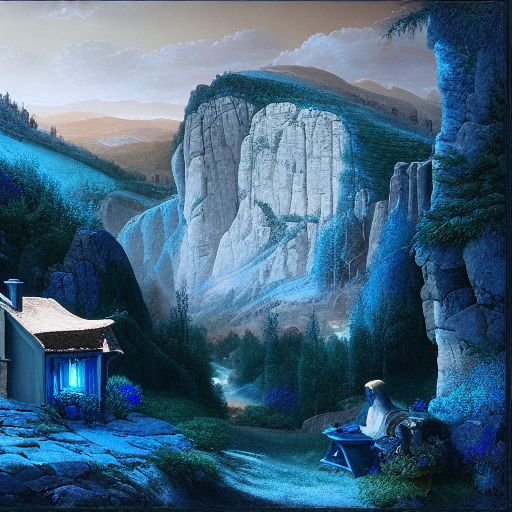

In [62]:
Image.fromarray(cv2.cvtColor(results[0], cv2.COLOR_BGR2RGB), "RGB")